# Clustering

In [1]:
import pandas as pd
import csv
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
in_data = os.path.join('data','gephi_node_export_scenario3_full.csv')
out_data = os.path.join('data','clustered_data.csv')


df = pd.read_csv(in_data, usecols=['Id', 'is_from_uk', 'is_from_esp','is_from_france','is_from_monaco'])

In [3]:
df['is_from_uk'] = df['is_from_uk'].astype('uint8')
df['is_from_esp'] = df['is_from_esp'].astype('uint8')
df['is_from_france'] = df['is_from_france'].astype('uint8')
df['is_from_monaco'] = df['is_from_monaco'].astype('uint8')
df

,Id,is_from_uk,is_from_esp,is_from_france,is_from_monaco
0,716238475,0,0,0,0
1,188039706,0,0,0,0
2,437610627,0,0,0,0
3,248807431,0,0,0,0
4,138456571,0,0,0,0
...,...,...,...,...,...
227,142204481,0,0,0,0
228,386420143,0,0,0,0
229,38170974,0,0,0,0
230,75517951,0,0,0,0


In [4]:
# Identificadores.
id_df = df['Id']

In [5]:
# Dejamos solo las features que necesita el modelo.
model_input = df.drop(columns=['Id'])
model_input

,is_from_uk,is_from_esp,is_from_france,is_from_monaco
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
227,0,0,0,0
228,0,0,0,0
229,0,0,0,0
230,0,0,0,0


In [6]:
def plot_elbow (mean_vector):

    wcss=[]

    for i in range(1,20):
        kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(mean_vector)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,20), wcss)
    plt.title('Elbow method')
    plt.xlabel('Num of cluster')
    plt.ylabel('WCSS')
    plt.show()

<ipython-input-6-d010cb105a18>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(mean_vector)
<ipython-input-6-d010cb105a18>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(mean_vector)
<ipython-input-6-d010cb105a18>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(mean_vector)
<ipython-input-6-d010cb105a18>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(mean_vector)
<ipython-input-6-d010cb105a18>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(mean_vector)
<ipython-input-6-d010cb105a18>:7: ConvergenceWarning: Number of disti

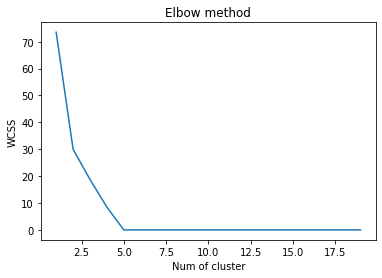

In [7]:
plot_elbow(model_input)

Si seguimos la teoría del elbow method, nos quedamos con 5 clusters.

In [8]:
clf=KMeans(n_clusters=5, max_iter=100, init='k-means++', n_init=1)
clf.fit(model_input)
labels=clf.predict(model_input)

                0   1   3   2  4
num sentence  143  57  12  11  9


<AxesSubplot:>

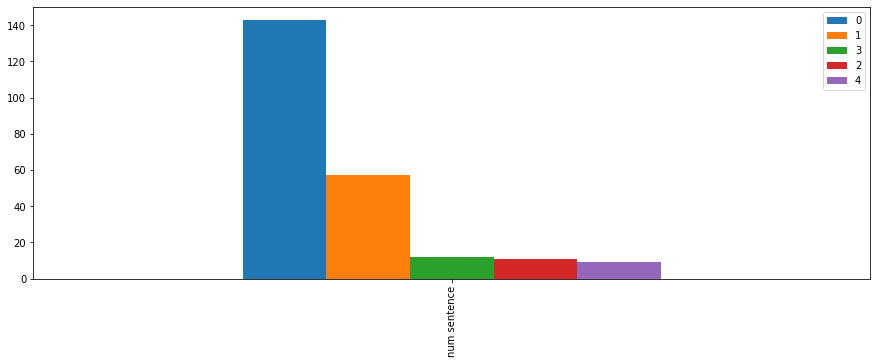

In [9]:
distribucion=pd.DataFrame(pd.Series(labels).value_counts(), columns=['num sentence']).T
print(distribucion)
distribucion.plot(kind='bar', figsize=(15,5))

In [10]:
df['cluster'] = labels
df

,Id,is_from_uk,is_from_esp,is_from_france,is_from_monaco,cluster
0,716238475,0,0,0,0,0
1,188039706,0,0,0,0,0
2,437610627,0,0,0,0,0
3,248807431,0,0,0,0,0
4,138456571,0,0,0,0,0
...,...,...,...,...,...,...
227,142204481,0,0,0,0,0
228,386420143,0,0,0,0,0
229,38170974,0,0,0,0,0
230,75517951,0,0,0,0,0


In [11]:
df['cluster'].unique()

array([0, 4, 1, 3, 2], dtype=int32)

In [12]:
df.to_csv(out_data)